In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA,KernelPCA

In [4]:
def get_make_classification(n_samples, n_features, n_informative, n_redundant, n_classes):
    
    '''
    We simulate the dataset using random distribution with parameters:
    
    n_samples: number of samples
    
    n_features: number of features
    
    n_informative: The number of informative features. Each class is composed of a number of gaussian clusters 
                   each located around the vertices of a hypercube in a subspace of dimension n_informative. 
                   For each cluster, informative features are drawn independently from N(0, 1) and 
                   then randomly linearly combined within each cluster in order to add covariance. 
                   The clusters are then placed on the vertices of the hypercube.
                   
                   Default: 2
                   
    n_redundant: The number of redundant features. These features are generated as random linear combinations 
                 of the informative features.
                 
                 Default: 2
                 
    n_classes: number of classes
    
    weights: The proportions of samples assigned to each class. 
             If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight
             is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1. 
             Note that the actual class proportions will not exactly match weights when flip_y isn’t 0.
    
    flip_y: The fraction of samples whose class is assigned randomly. 
            Larger values introduce noise in the labels and make the classification task harder. 
            Note that the default setting flip_y > 0 might lead to less than n_classes in y in some cases.
            
            Default: 0.01

    '''
    X,y = make_classification(n_samples = n_samples, 
                              n_features = n_features,
                              n_informative = n_informative,
                              n_redundant = n_redundant, 
                              n_classes = n_classes,
                              random_state = 1)
    
    return X,y

In [5]:
def plot_classification_performance(clf,X,y_true, step, binary):
   
    '''
    performance of classification is evaluated with:
    
    1) accuracy: (TP + TN)/(TP + TN + FP + FN)
    
    2) precision: TP / (TP + FP)
    
    3) recall (sensitivity, true positive rate): TP / (TP + FN)
    
    4) f_score: 2 * precision * recall / (precision + recall)
    
    5) precsion_recall_curve: x-axis: precision, y-axis: recall
    
    6) roc_curve: x-axis: true positive rate, y-axis: false positive rate
                
                true positive rate (recall, sensitivity): TP / (TP + FN)
                false positive rate (fall out, 1 - specificity): FP / (FP + TN) = 1 - specificity = 1 - TN / (TN + FP)
                
                specifity (or true negative rate): TN / (TN + FP) 
    
    7) confusion_matrix = [TP  FP
                           FN  TN]  
    
    '''
    
    accuracy = clf.score(X,y_true)
    
    if binary:
    
       
    
        y_pred = clf.predict(X)
        
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
    
    
        plot_roc_curve(clf, X, y_true)
        plt.title('{} ROC curve'.format(step))
    
        plot_precision_recall_curve(clf, X, y_true)
        plt.title('{} Precision Recall curve'.format(step))
        
        
        plot_confusion_matrix(clf,X, y_true)
        plt.title('{} Confusion Matrix'.format(step))
        
    else:
        
        
        n_classes = len(clf.classes_)
        #y_score = clf.predict_proba(X)
        y_score = clf.decision_function(X)
        y_pred = clf.predict(X)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
    
        precision = dict()
        recall = dict()
        f_score = dict()
    
        y_true_dummies = pd.get_dummies(y_true, drop_first = False).values
    
        for i in range(n_classes):
        
            fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
            precision[i], recall[i],_ =  precision_recall_curve(y_true_dummies[:, i], y_score[:, i])
            
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
                                                                
       
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('{} ROC curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label = 'Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)

        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title('{} Precision Recall curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label = 'Class {}'.format(i))
        
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        plot_confusion_matrix(clf,X,y_true)
        
        
    

# Binary Classification - Logistic Regression - Simulated Dataset

## 1. Get the dataset

In [7]:
n_samples = 1000
n_features = 40
n_informative = 2
n_redundant = 2

n_classes = 2




X,y = get_make_classification(n_samples, n_features,n_informative,n_redundant,n_classes)

(array([496.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 504.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

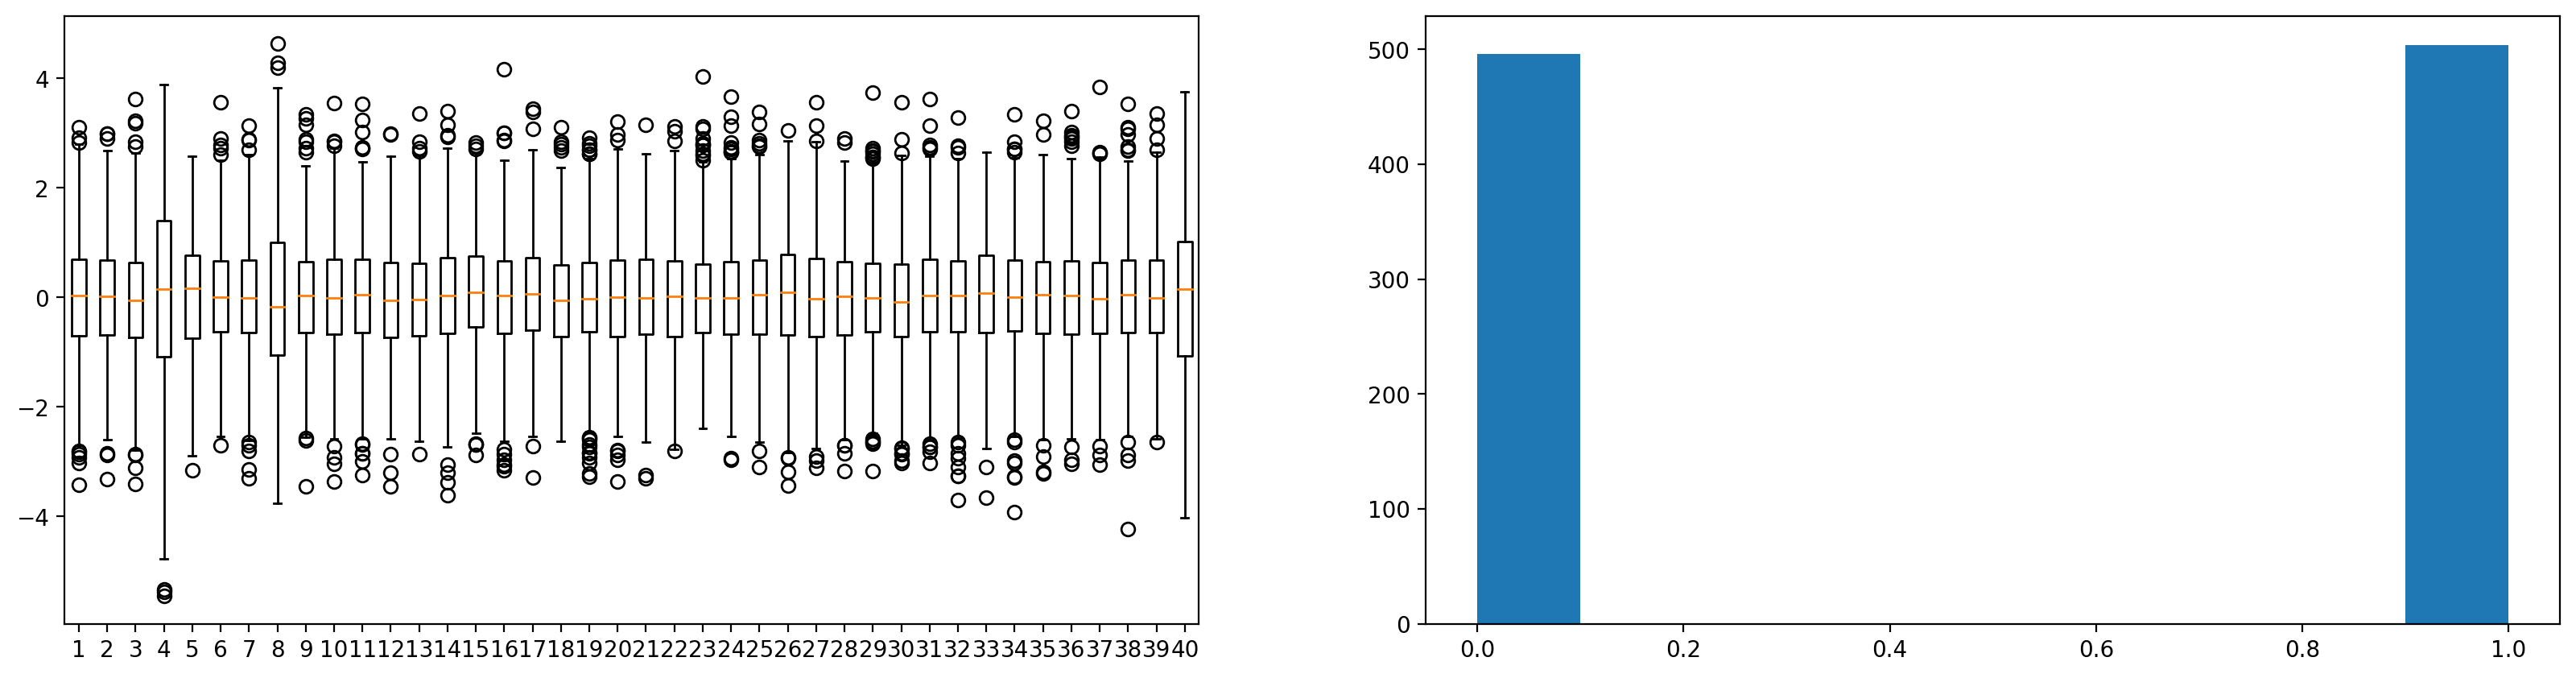

In [8]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
plt.boxplot(X)

ax = fig.add_subplot(1,2,2)
plt.hist(y)

## 2. Logistic Regression Implementation

In [9]:
Cs = [1e-3,1e-2, 1e-1,1e0,1e1,1e2]
cv = 10
multi_class = 'auto'
penalty = 'l2'
log_reg_cv = LogisticRegressionCV(cv = cv, Cs = Cs, penalty = penalty, multi_class = multi_class)

log_reg_cv.fit(X,y)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], cv=10)

In [10]:
log_reg_cv.scores_

{1: array([[0.86, 0.88, 0.88, 0.88, 0.88, 0.88],
        [0.86, 0.87, 0.85, 0.85, 0.85, 0.85],
        [0.83, 0.87, 0.85, 0.85, 0.85, 0.85],
        [0.8 , 0.86, 0.84, 0.83, 0.83, 0.83],
        [0.87, 0.87, 0.87, 0.86, 0.86, 0.86],
        [0.77, 0.8 , 0.81, 0.81, 0.81, 0.81],
        [0.75, 0.81, 0.81, 0.81, 0.81, 0.81],
        [0.8 , 0.84, 0.83, 0.82, 0.82, 0.82],
        [0.82, 0.85, 0.86, 0.84, 0.84, 0.84],
        [0.77, 0.8 , 0.78, 0.78, 0.78, 0.78]])}

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [230]:
'''
penalty: 'l2', 'l1' , 'elasticnet'
            
        Used to specify the norm used in the penalization. 
    
        loss function of Logistic Regression with penalty 'l2':
             
             L(B,C) = C * sum_n [log(exp(-y_i * (X_iT * B + c)) + 1)] + 1/2 * B^2
             
             
        loss function of Logistic Regression with penalty 'l1':
             
             L(B,C) = C * sum_n [log(exp(-y_i * (X_iT * B + c)) + 1)] + 1/2 * ||B||
             
             
        loss function of Logistic Regression with penalty 'elasticnet' (combination of 'l1' and 'l2'):
             
             L(B,C) = C * sum_n [log(exp(-y_i * (X_iT * B + c)) + 1)] + (1 - rho)/2*B^2 + rho * ||B||
             
             rho: l1_ratio >>> controls the strength of the strenght of l2 regularization vs. l1 regularization
             
             
C: positive float used in the loss function of Logistic Regression
       
       Inverse of regularization strength; must be a positive float. 
       Like in support vector machines, smaller values specify stronger regularization
       
       
fit_intercept: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    
    
multi_class: 'auto', 'ovr', 'multinomial'
             
              auto': binary classification
                
              'ovr': One Versus Rest implentation in case of multiclass label
    
    
    
'''
    

penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       332
           1       0.86      0.89      0.87       338

    accuracy                           0.87       670
   macro avg       0.87      0.87      0.87       670
weighted avg       0.87      0.87      0.87       670



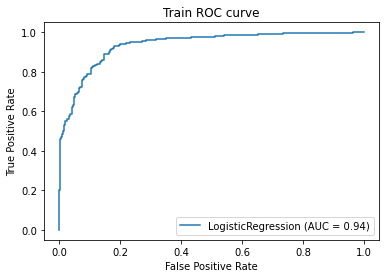

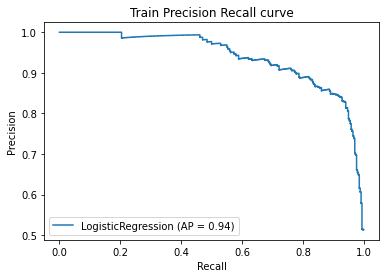

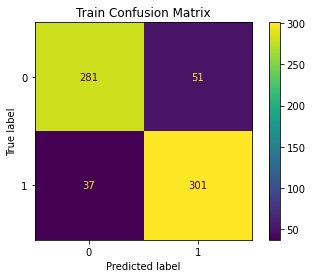

In [13]:
plot_classification_performance(log_reg, X_train,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       164
           1       0.80      0.87      0.84       166

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



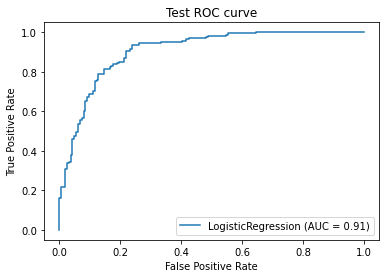

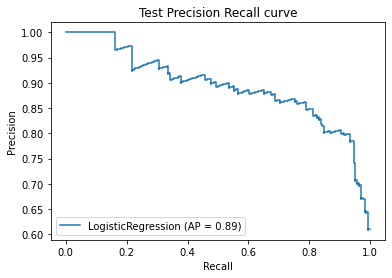

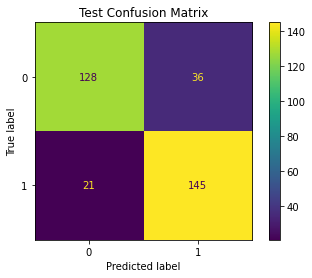

In [14]:
plot_classification_performance(log_reg, X_test,y_test, step ='Test', binary = True)

# Multiclass Classification - Logistic Regression with OVR and OVO - Simulated Dataset




**Logistic Regression** is a classification algorithm for **Binary Classification**

However, it is possible to use Logistic Regression with **MultiClass Classification**
    
using the **One Versus Rest (OVR) (called also One Versus All (OVA))** or the **One Versus One (OVO)** implementation
    
Useful link:

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

**OVR** example:

**classes**: red, green, blue, yellow

- binary classification: red, [green, blue,yellow]
- binary classification: green, [red, blue,yellow]
- binary classification: blue, [red, green,yellow]
- binary classification: yellow, [red,green,blue]

So, N classes, N models

This approach requires that each model predicts a class membership probability or a probability-like score. 
The argmax of these scores (class index with the largest score) is then used to predict a class.

This approach is commonly used for algorithms that naturally predict numerical class membership probability or score, 
such as:

- Logistic Regression
- Perceptron


A possible downside of this approach is that it requires one model to be created for each class. 
For example, three classes requires three models. 
This could be an issue for large datasets (e.g. millions of rows), slow models (e.g. neural networks), 
or very large numbers of classes (e.g. hundreds of classes).


**OVO** example:

**classes**: red, green, blue, yellow

- binary classification: red, green

- binary classification: red, blue

- binary classification: red, yellow
- binary classification: green, blue
- binary classification: green, yellow
- binary classification: blue, yellow

N classes N(N - 1)/2 models

Each binary classification model may predict one class label and the model 
with the most predictions or votes is predicted by the one-vs-one strategy.

Similarly, if the binary classification models predict a numerical class membership, such as a probability, 
then the argmax of the sum of the scores (class with the largest sum score) is predicted as the class label.

Classically, this approach is suggested for support vector machines (SVM) and related kernel-based algorithms. 
This is believed because the performance of kernel methods does not scale in proportion to the size 
of the training dataset and using subsets of the training data may counter this effect.

1) OVO is not reccomended for Logistic Regression, OVA is better

2) In general, it is better to not use Logistic Regression for Multiclass Classification, other algorithms 
   such as Linear Discriminant Analysis (LDA) are more robust



## 1. Get the dataset

In [15]:
n_samples = 1000
n_features = 40
n_informative = 5
n_redundant = 5

n_classes = 5

X,y = get_make_classification(n_samples = n_samples,
                              n_features = n_features,
                              n_informative = n_informative,
                              n_redundant = n_redundant,
                              n_classes = n_classes)
                    

(array([203.,   0., 200.,   0.,   0., 199.,   0., 199.,   0., 199.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

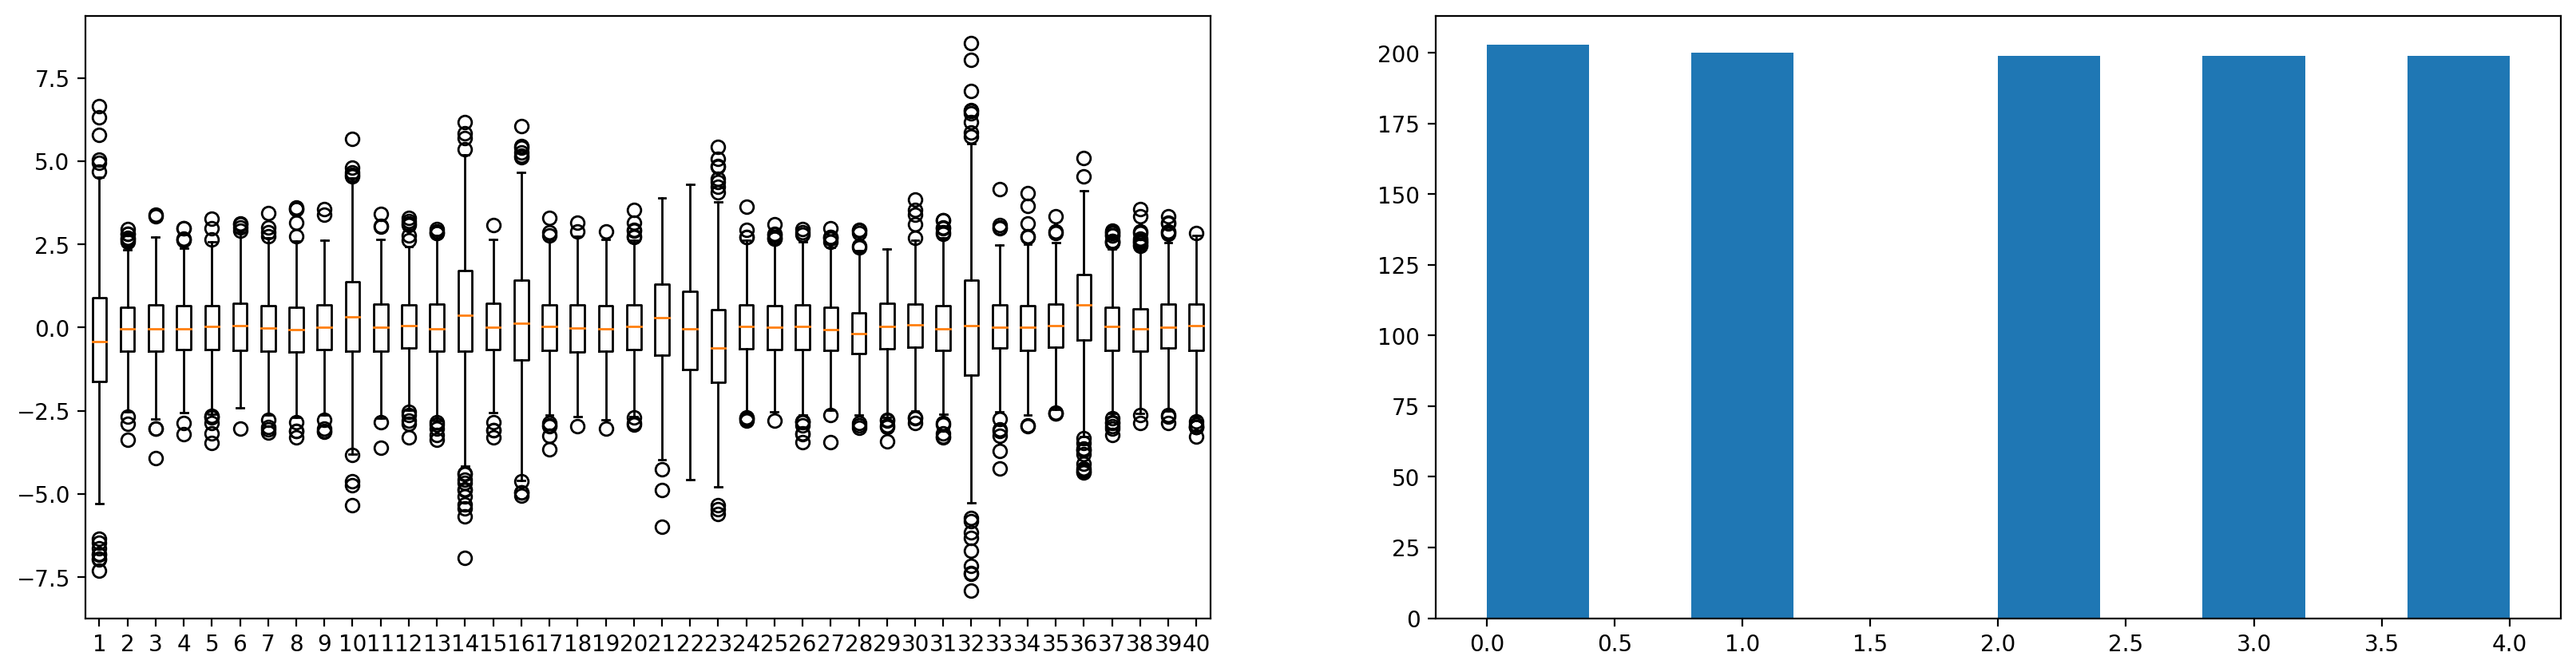

In [16]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
plt.boxplot(X)

ax = fig.add_subplot(1,2,2)
plt.hist(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

## 2. OVR Logistic Regression automatically implemented in Scikit-Learn

In [18]:
penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'ovr'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train, y_train)


LogisticRegression(C=1, multi_class='ovr')

Train Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       132
           1       0.60      0.64      0.61       137
           2       0.67      0.69      0.68       137
           3       0.59      0.55      0.57       132
           4       0.62      0.58      0.60       132

    accuracy                           0.61       670
   macro avg       0.61      0.61      0.61       670
weighted avg       0.61      0.61      0.61       670



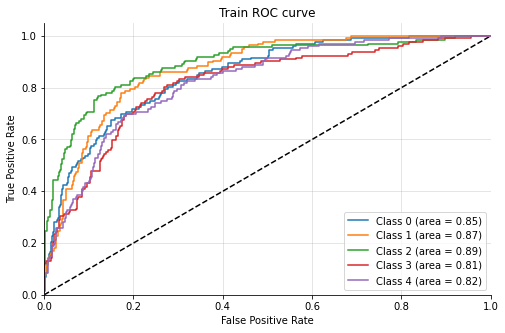

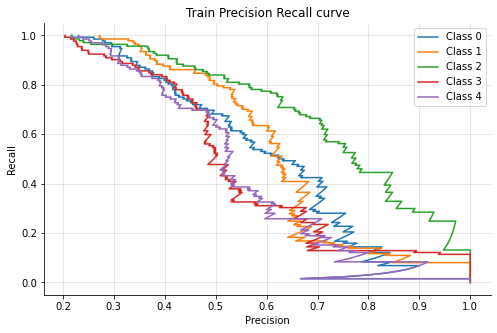

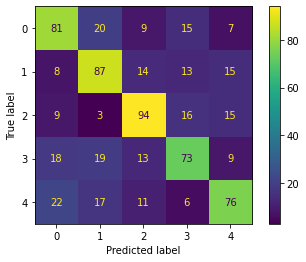

In [19]:
plot_classification_performance(log_reg, X_train,y_train, step ='Train', binary = False)

Test Classification Report
              precision    recall  f1-score   support

           0       0.58      0.42      0.49        71
           1       0.40      0.54      0.46        63
           2       0.52      0.63      0.57        62
           3       0.50      0.42      0.46        67
           4       0.48      0.45      0.47        67

    accuracy                           0.49       330
   macro avg       0.50      0.49      0.49       330
weighted avg       0.50      0.49      0.49       330



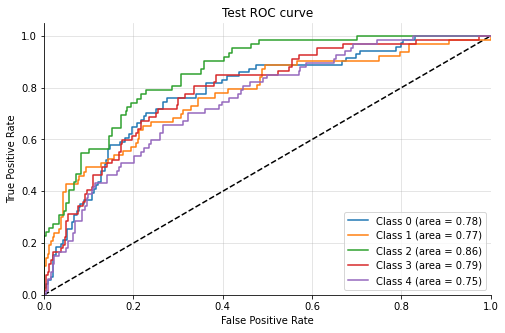

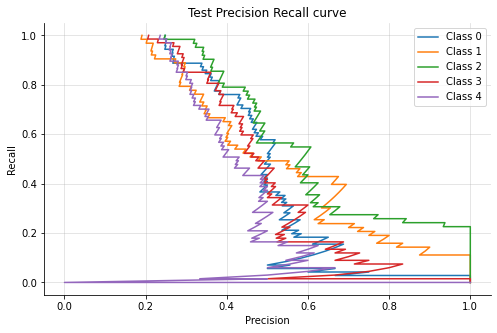

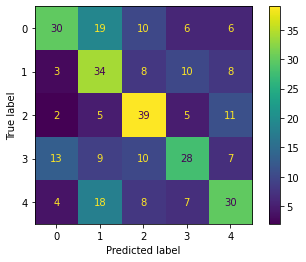

In [20]:
plot_classification_performance(log_reg, X_test,y_test, step ='Test', binary = False)

## 3. OVR using OneVsRestClassifier

In [21]:
C = 1
penalty = 'l2'
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

ovr = OneVsRestClassifier(log_reg)

ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1))

Train Classification Report
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       132
           1       0.60      0.64      0.61       137
           2       0.67      0.69      0.68       137
           3       0.59      0.55      0.57       132
           4       0.62      0.58      0.60       132

    accuracy                           0.61       670
   macro avg       0.61      0.61      0.61       670
weighted avg       0.61      0.61      0.61       670



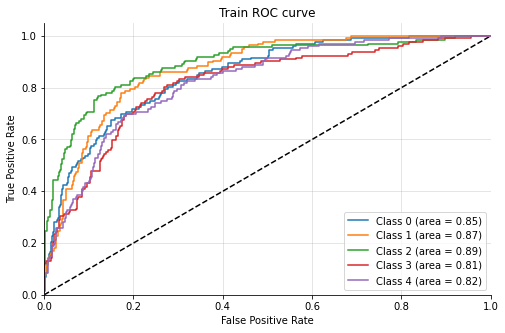

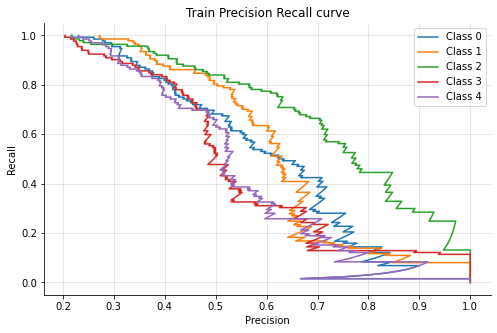

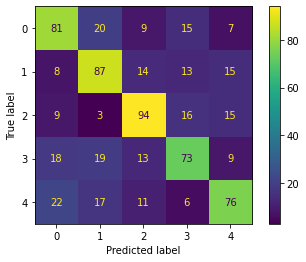

In [22]:
plot_classification_performance(ovr, X_train,y_train, step ='Train', binary = False)

Test Classification Report
              precision    recall  f1-score   support

           0       0.58      0.42      0.49        71
           1       0.40      0.54      0.46        63
           2       0.52      0.63      0.57        62
           3       0.50      0.42      0.46        67
           4       0.48      0.45      0.47        67

    accuracy                           0.49       330
   macro avg       0.50      0.49      0.49       330
weighted avg       0.50      0.49      0.49       330



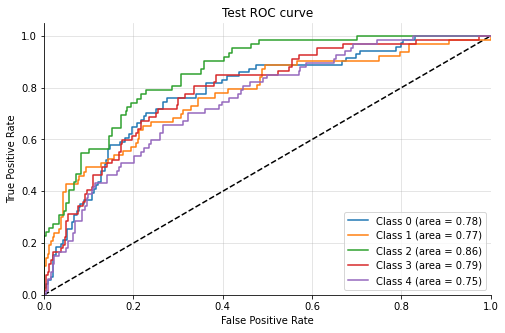

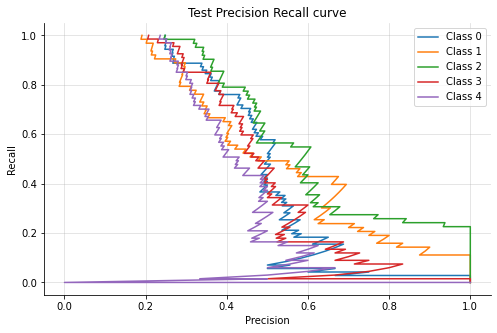

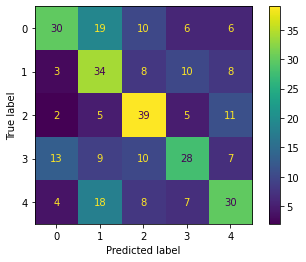

In [23]:
plot_classification_performance(ovr, X_test,y_test, step ='Test', binary = False)

## 4. OVO using OneVsOneClassifier

In [24]:
C = 1
penalty = 'l2'
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

ovo = OneVsOneClassifier(log_reg)

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1))

Train Classification Report
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       132
           1       0.62      0.65      0.63       137
           2       0.70      0.69      0.69       137
           3       0.59      0.57      0.58       132
           4       0.65      0.61      0.62       132

    accuracy                           0.63       670
   macro avg       0.63      0.63      0.63       670
weighted avg       0.63      0.63      0.63       670



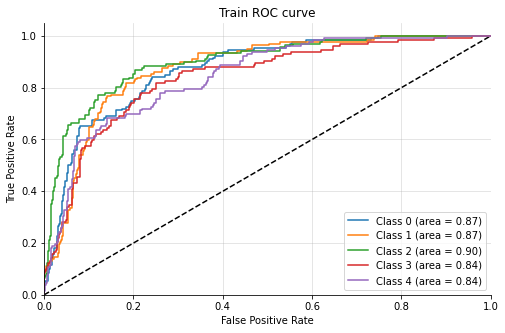

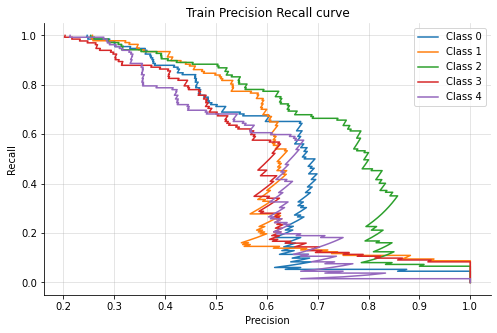

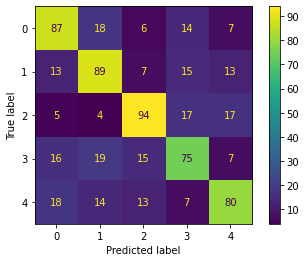

In [25]:
plot_classification_performance(ovo, X_train,y_train, step ='Train', binary = False)

Test Classification Report
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        71
           1       0.46      0.62      0.53        63
           2       0.55      0.68      0.60        62
           3       0.56      0.46      0.51        67
           4       0.52      0.51      0.52        67

    accuracy                           0.54       330
   macro avg       0.55      0.54      0.54       330
weighted avg       0.55      0.54      0.54       330



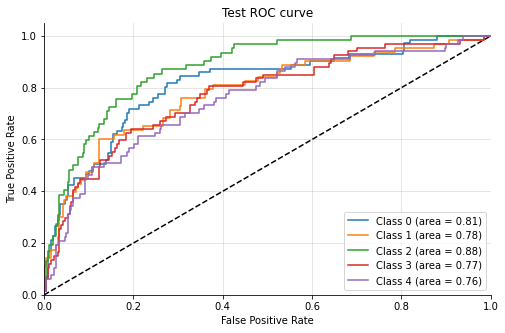

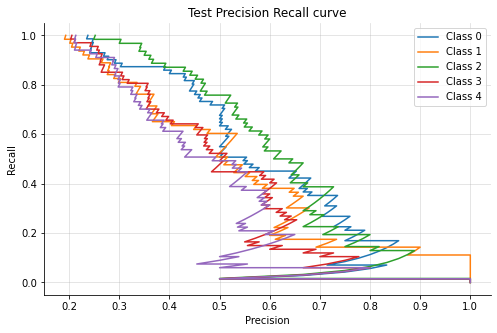

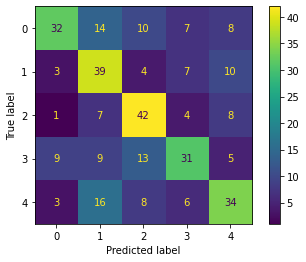

In [26]:
plot_classification_performance(ovo, X_test,y_test, step ='Test', binary = False)

# Multiclass Classification - Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) - Simulated Dataset


**Linear Discriminant Analysis (LDA)** and **Quadratic Discriminant Analysis (QDA)** are more robust algorithms for **multi-class classification** compared to Logistic Regression extended to multi-class classification with OVR and OVO. LDA and QDA are designed as Multiclass Classifiers:

- using the **Bayes Theorem** to predict **the posterior probability *p*(Y = K | X)**
- **the prior *p*(Y = K)** is calculated as the frequency of the class K 
- **the marginalization *p*(X)** is the **sum over the classes of the product between the prior *p*(Y = K) and the likelihood *p*(X | Y = K) for the class K**
- assuming that **the likelihood *p*(X | Y = K) can be modeled as a Multivariate Gaussian Distribution**

***p*(X | Y = K) = 1 / ((2 * pi) ^ p/2 * Cov( X ) ^ 1/2) * exp (- 1 / 2 * (X - u) ^ T * Cov( X ) ^ -1 * (X - u))**
 
 
 where:
 - **X**: feature vector X = X1, ..., Xp of the observation n = 1, ..., N
 - **Cov(X)** = p x p covariance matrix of X
 - **u**: mean of the vector X = X1, ..., Xp over all the observations in a class

Modeling ***p*(X | Y = K)** with a Gaussian Distribution it means assuming that X = (X1, ..., Xp) is drawn from a Gaussian distributuin with mean u and covariance Cov(X), that is X ~ *N*(u, Cov)

## 1. Get the dataset

In [27]:
n_samples = 1000
n_features = 10
n_informative = 5
n_redundant = 5

n_classes = 5

X,y = get_make_classification(n_samples = n_samples,
                              n_features = n_features,
                              n_informative = n_informative,
                              n_redundant = n_redundant,
                              n_classes = n_classes)
                    

(array([199.,   0., 202.,   0.,   0., 202.,   0., 199.,   0., 198.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

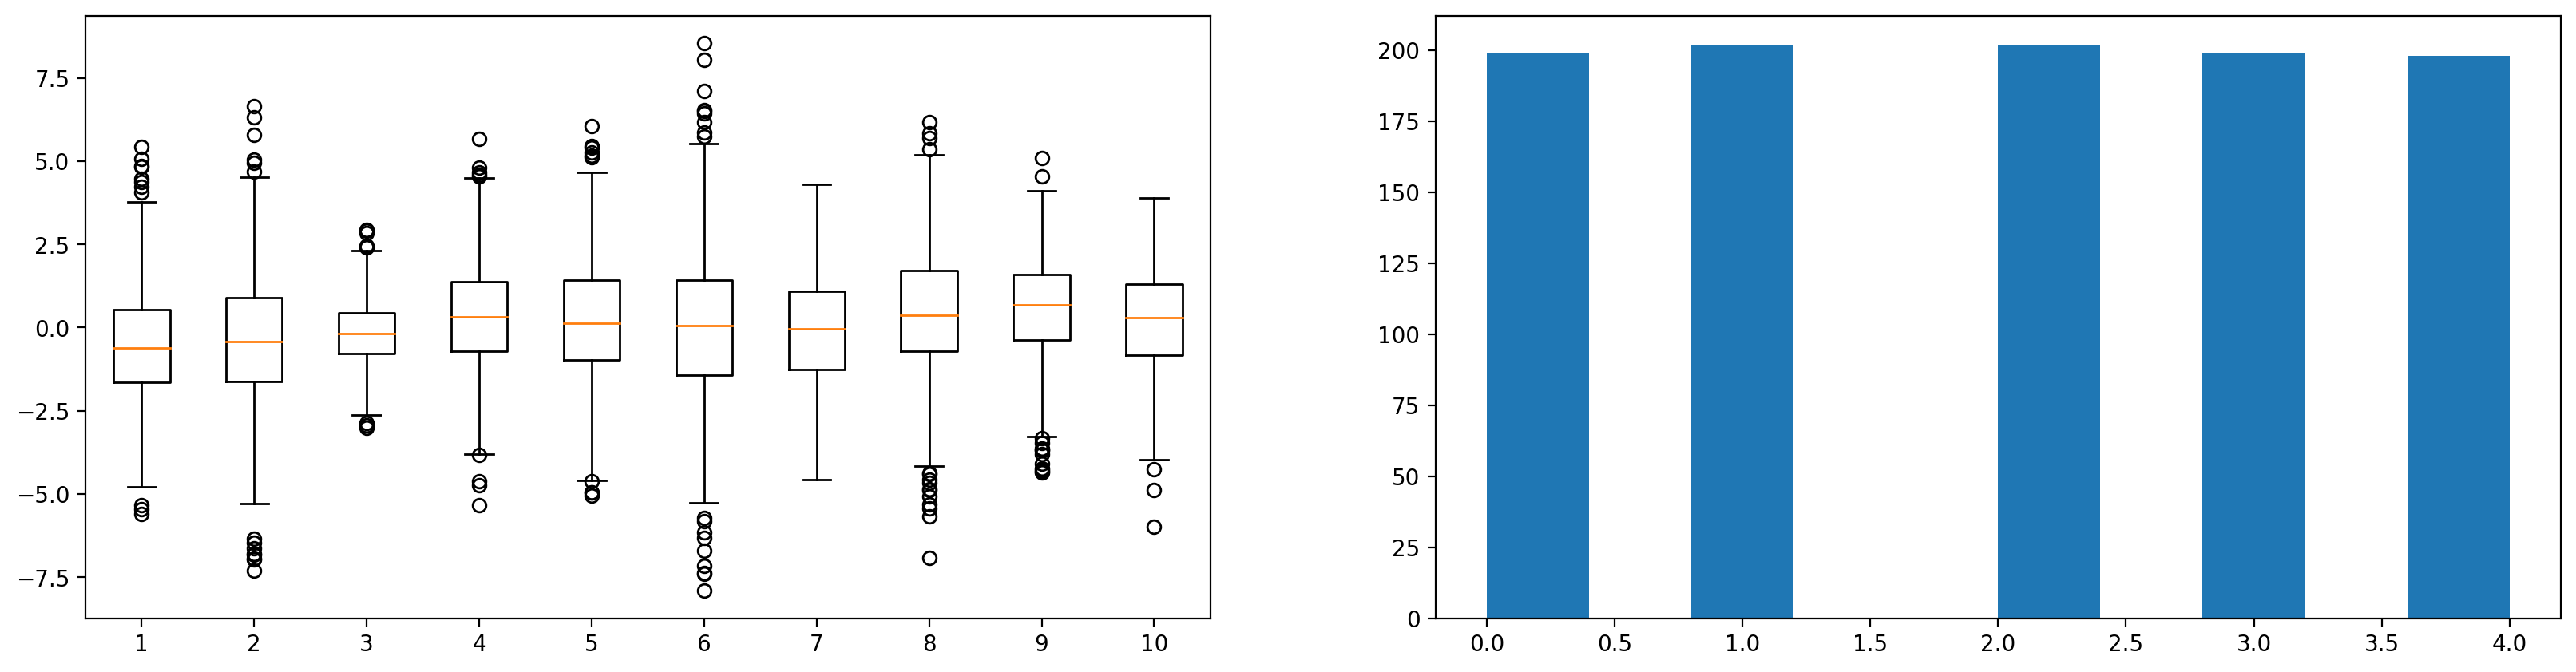

In [28]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
plt.boxplot(X)

ax = fig.add_subplot(1,2,2)
plt.hist(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

## 2. Linear Discriminant Analysis (LDA)


LDA makes the assumption that **each class as the same variance (and thus the same standard deviation)**:

- **sigma_1 = sigma_2 = sigm_3 = ... = sigma_k = sigma**

Thus, **the covariance matrix is the same for each class**.

This assumption results in a **linear decsion function**:

**eta_k(X) = X^T * Cov(X) ^ -1 * u_k - 1/2 * u_k ^ T * Cov (X) ^ -1 * u_k  + log (*p*(Y = k))**


where:

- **X**: feature vector X = X1, ..., Xp of the observation n = 1, ..., N

- **Cov(X)** = p x p covariance matrix of X. It is assumed to be the same for all classes.

- **u_k**: class specific mean vector calculated as **1 / n_k * sum (X1, ... , Xp)**

where:
           
- **n_k**: number of observations in the class k

- **sum (X1, ... , Xp)**: sum of the feature values over all the elements in the class k


**LDA assign the class k = 1, ..., K with the largest value of eta_k(X)**




In [30]:
'''
solver: Solver to use: ‘svd’, ‘lsqr’, ‘eigen’, default=’svd’

        ‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, 
               therefore this solver is recommended for data with a large number of features.
               
        ‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.
        
        ‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.
        
        It is recommended to use 'svd' which does not compute covariance matrix as expected by the LDA algorithm
        
        
shrinkage:  Shrinkage parameter: ‘auto’ or float, default=None

            None: no shrinkage (default).
            
            ‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
            
            float between 0 and 1: fixed shrinkage parameter.
            
            This should be left to None if covariance_estimator is used. 
            
            Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers. 
            
            Since we use 'svd' solver, we leave shrinkage to None.
            

priors: The class prior probabilities p (Y = K) 
        
        array-like of shape (n_classes,), default=None

        The class prior probabilities. By default, the class proportions are inferred from the training data.


n_components: Number of components (<= min(n_classes - 1, n_features)) for dimensionality reductionint.
        
              default=None. If None, will be set to min(n_classes - 1, n_features). 
              
              This parameter only affects the transform method.
              
              
store_covariance:  bool, default=False.
                   If True, explicitely compute the weighted within-class covariance matrix when solver is ‘svd’. 
                   The matrix is always computed and stored for the other solvers.
              
              
covariance_estimator: default=None
                     
                     If not None, covariance_estimator is used to estimate the covariance matrices 
                     instead of relying on the empirical covariance estimator (with potential shrinkage). 
                    
                    The object should have a fit method and a covariance_ attribute like 
                    the estimators in sklearn.covariance. 
                    
                    if None the shrinkage parameter drives the estimate.

                    This should be left to None if shrinkage is used. 
                    
                    Note that covariance_estimator works only with ‘lsqr’ and ‘eigen’ solvers.
'''

solver = 'svd'
store_covariance = True

lda = LinearDiscriminantAnalysis(solver = solver, store_covariance = store_covariance)

lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(store_covariance=True)

Train Classification Report
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       129
           1       0.54      0.53      0.54       137
           2       0.63      0.64      0.63       143
           3       0.54      0.49      0.51       129
           4       0.54      0.58      0.55       132

    accuracy                           0.56       670
   macro avg       0.56      0.56      0.56       670
weighted avg       0.56      0.56      0.56       670



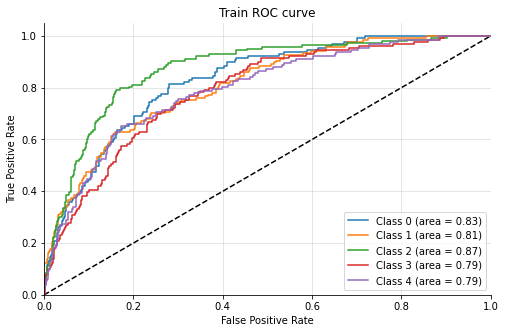

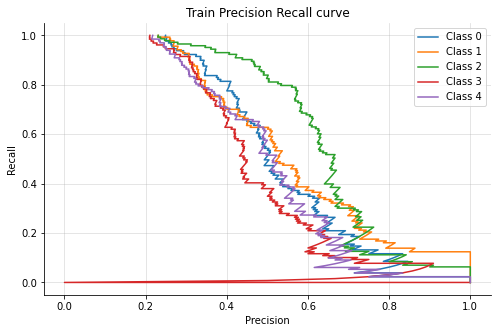

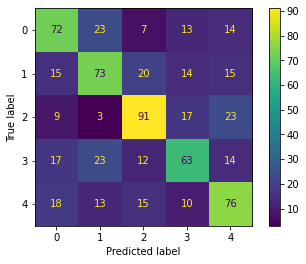

In [31]:
plot_classification_performance(lda, X_train,y_train, step = 'Train', binary = False)

Test Classification Report
              precision    recall  f1-score   support

           0       0.57      0.56      0.57        70
           1       0.46      0.51      0.48        65
           2       0.54      0.64      0.59        59
           3       0.62      0.47      0.54        70
           4       0.48      0.48      0.48        66

    accuracy                           0.53       330
   macro avg       0.53      0.53      0.53       330
weighted avg       0.54      0.53      0.53       330



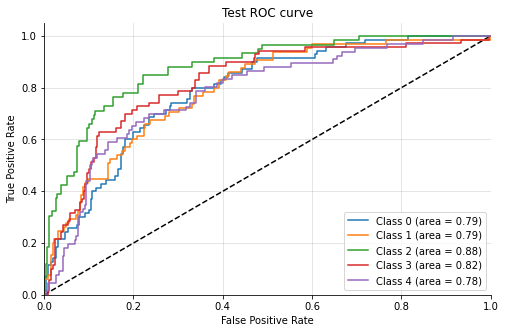

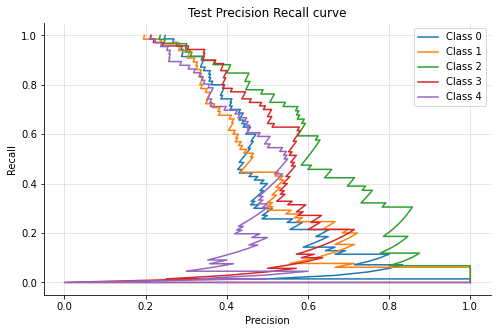

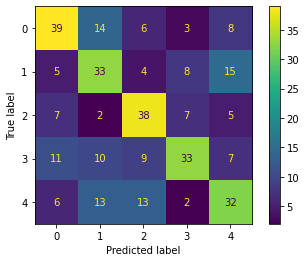

In [32]:
plot_classification_performance(lda, X_test,y_test, step = 'Test', binary = False)

## 3.1 Quadratic Discriminant Analysis (QDA)

**Quadratic Discriminant Analysis (QDA)**, in contrast to LDA, assumes that **each class has its own covariance matrix Cov_k(X)**. Then, **the decision function eta_k(X) assumes a quadratic form**.


Compared to LDA, **QDA tends to have a higher variance (higher test error, overfitting)**. On the other hand, if **LDA has a lower variance, it has also a higher bias (higher training error, underfitting)**. In general:

- LDA is recommended when we have relatively few training data, when reducing variance is crucail

- QDA is recommended when we have large training data, when reducing the variance is not a concern

In [33]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

Train Classification Report
              precision    recall  f1-score   support

           0       0.64      0.42      0.51       129
           1       0.51      0.71      0.60       137
           2       0.53      0.44      0.48       143
           3       0.46      0.43      0.44       129
           4       0.41      0.49      0.45       132

    accuracy                           0.50       670
   macro avg       0.51      0.50      0.49       670
weighted avg       0.51      0.50      0.50       670



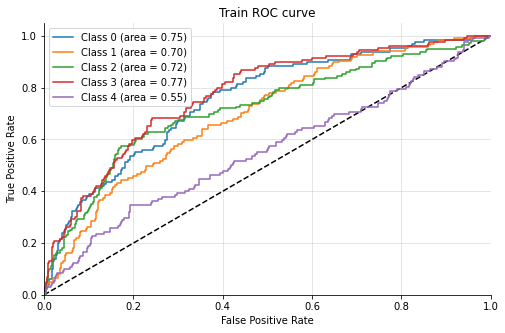

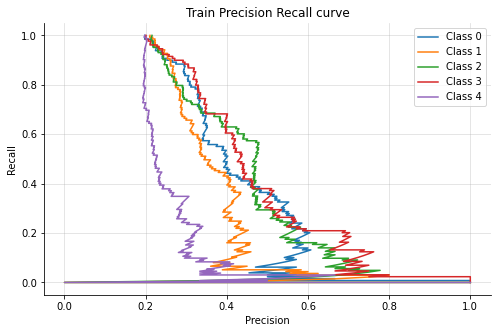

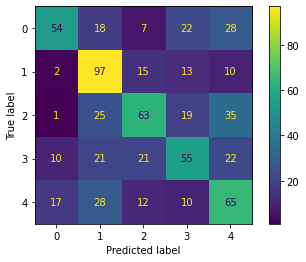

In [34]:
plot_classification_performance(qda, X_train,y_train, step = 'Train', binary = False)

Test Classification Report
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        70
           1       0.43      0.57      0.49        65
           2       0.38      0.36      0.37        59
           3       0.43      0.41      0.42        70
           4       0.39      0.52      0.44        66

    accuracy                           0.42       330
   macro avg       0.43      0.42      0.41       330
weighted avg       0.43      0.42      0.41       330



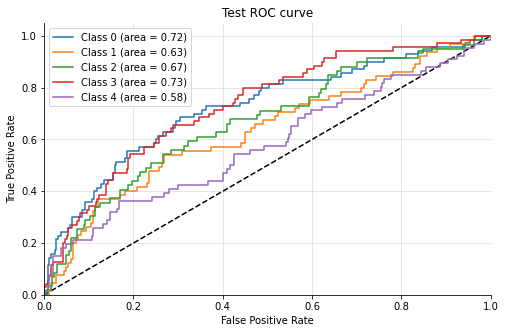

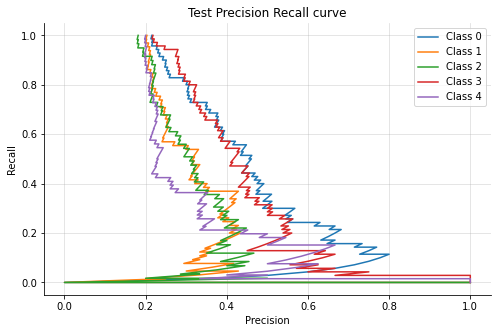

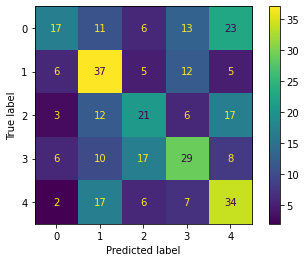

In [35]:
plot_classification_performance(qda, X_test,y_test, step = 'Test', binary = False)

# Binary Classification - Logistic Regression - Real Dataset

In [71]:
breast_cancer_dataset = datasets.load_breast_cancer()

In [79]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [52]:
X_df = pd.DataFrame(breast_cancer_dataset.data)
X_fn = breast_cancer_dataset.feature_names
X_df.columns = X_fn


y_df = pd.DataFrame(breast_cancer_dataset.target)
y_df.columns = ['cancer_type']



In [53]:
X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
y_df

,cancer_type
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## 1. Data Preprocessing

In [64]:
# features scaling

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_df.values)

X_scaled = pd.DataFrame(X_scaled)

X_scaled.columns = X_df.columns

y = y_df

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

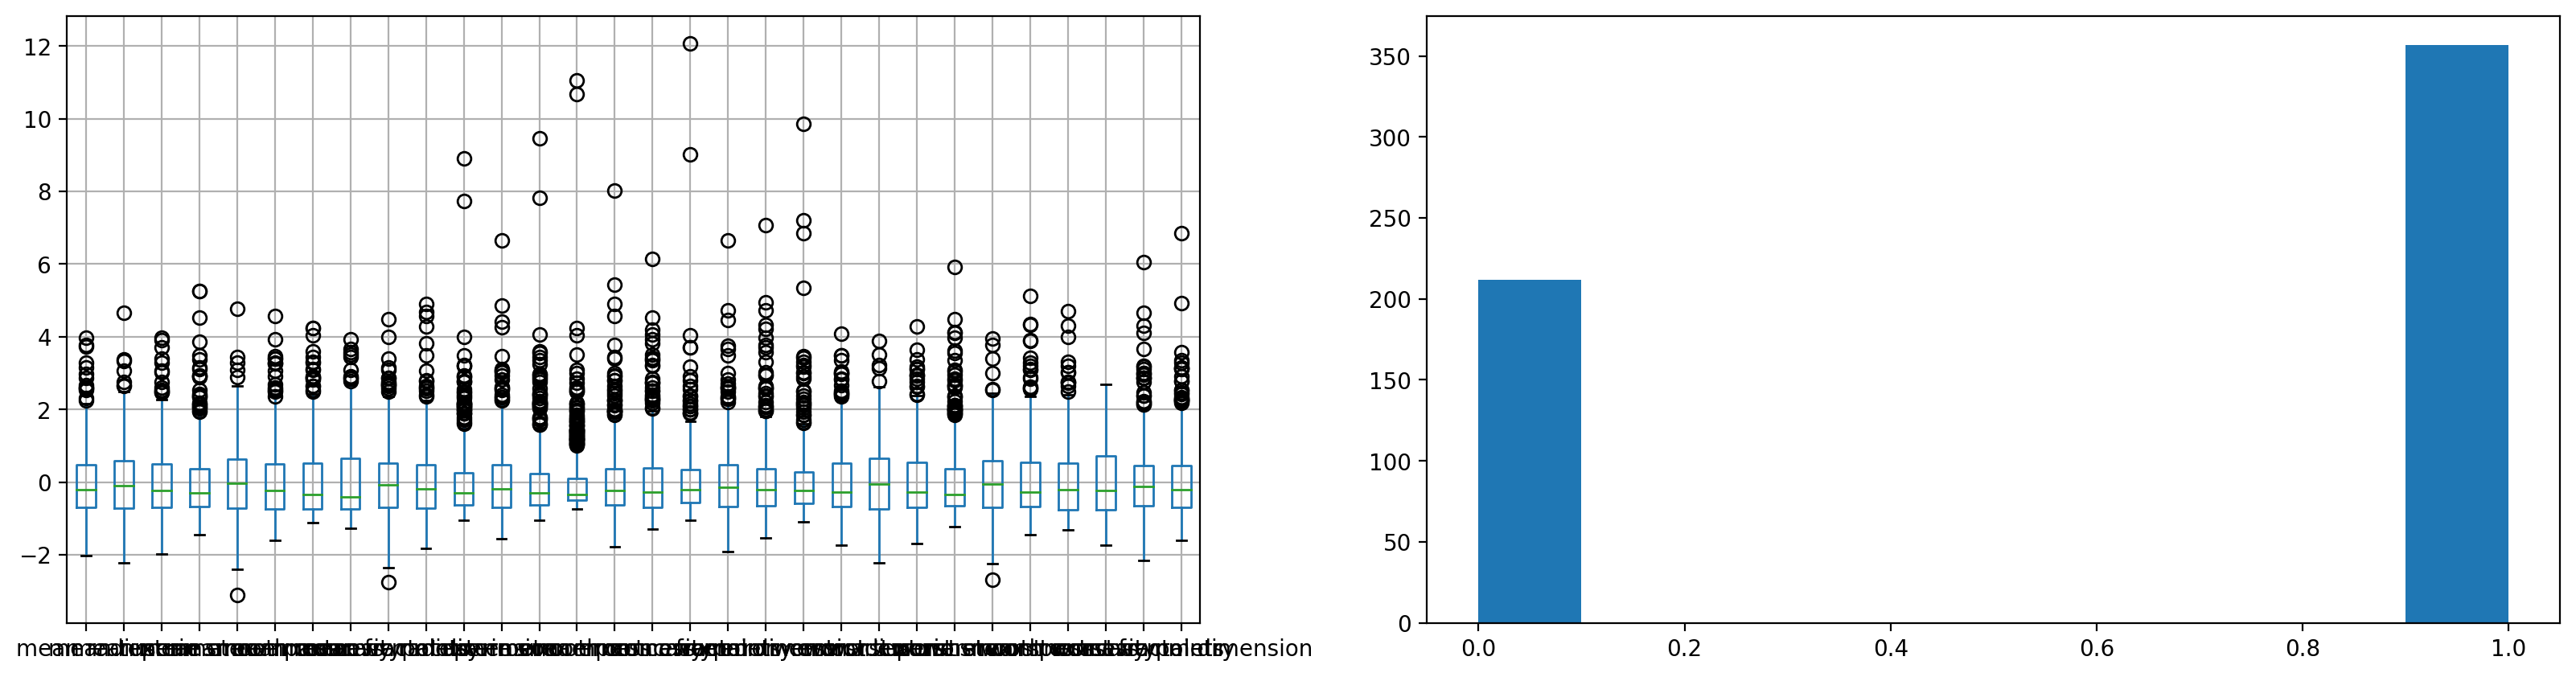

In [65]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
plt.hist(y)

In [90]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers

def get_remove_outliers(X,y,q):
    
    data = np.column_stack((X.values,y.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_clean.columns = X.columns
    
    y_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_clean.columns = y.columns
    
    return X_clean,y_clean

In [99]:
q = 3

X_clean, y_clean = get_remove_outliers(X_scaled,y, q)

fraction_removed_outliers =  1 - X_clean.shape[0] / X_scaled.shape[0]

print('Removed {:.1f} % data'.format(fraction_removed_outliers * 100))

Removed 13.2 % data


Text(0.5, 1.0, 'y after removing outliers')

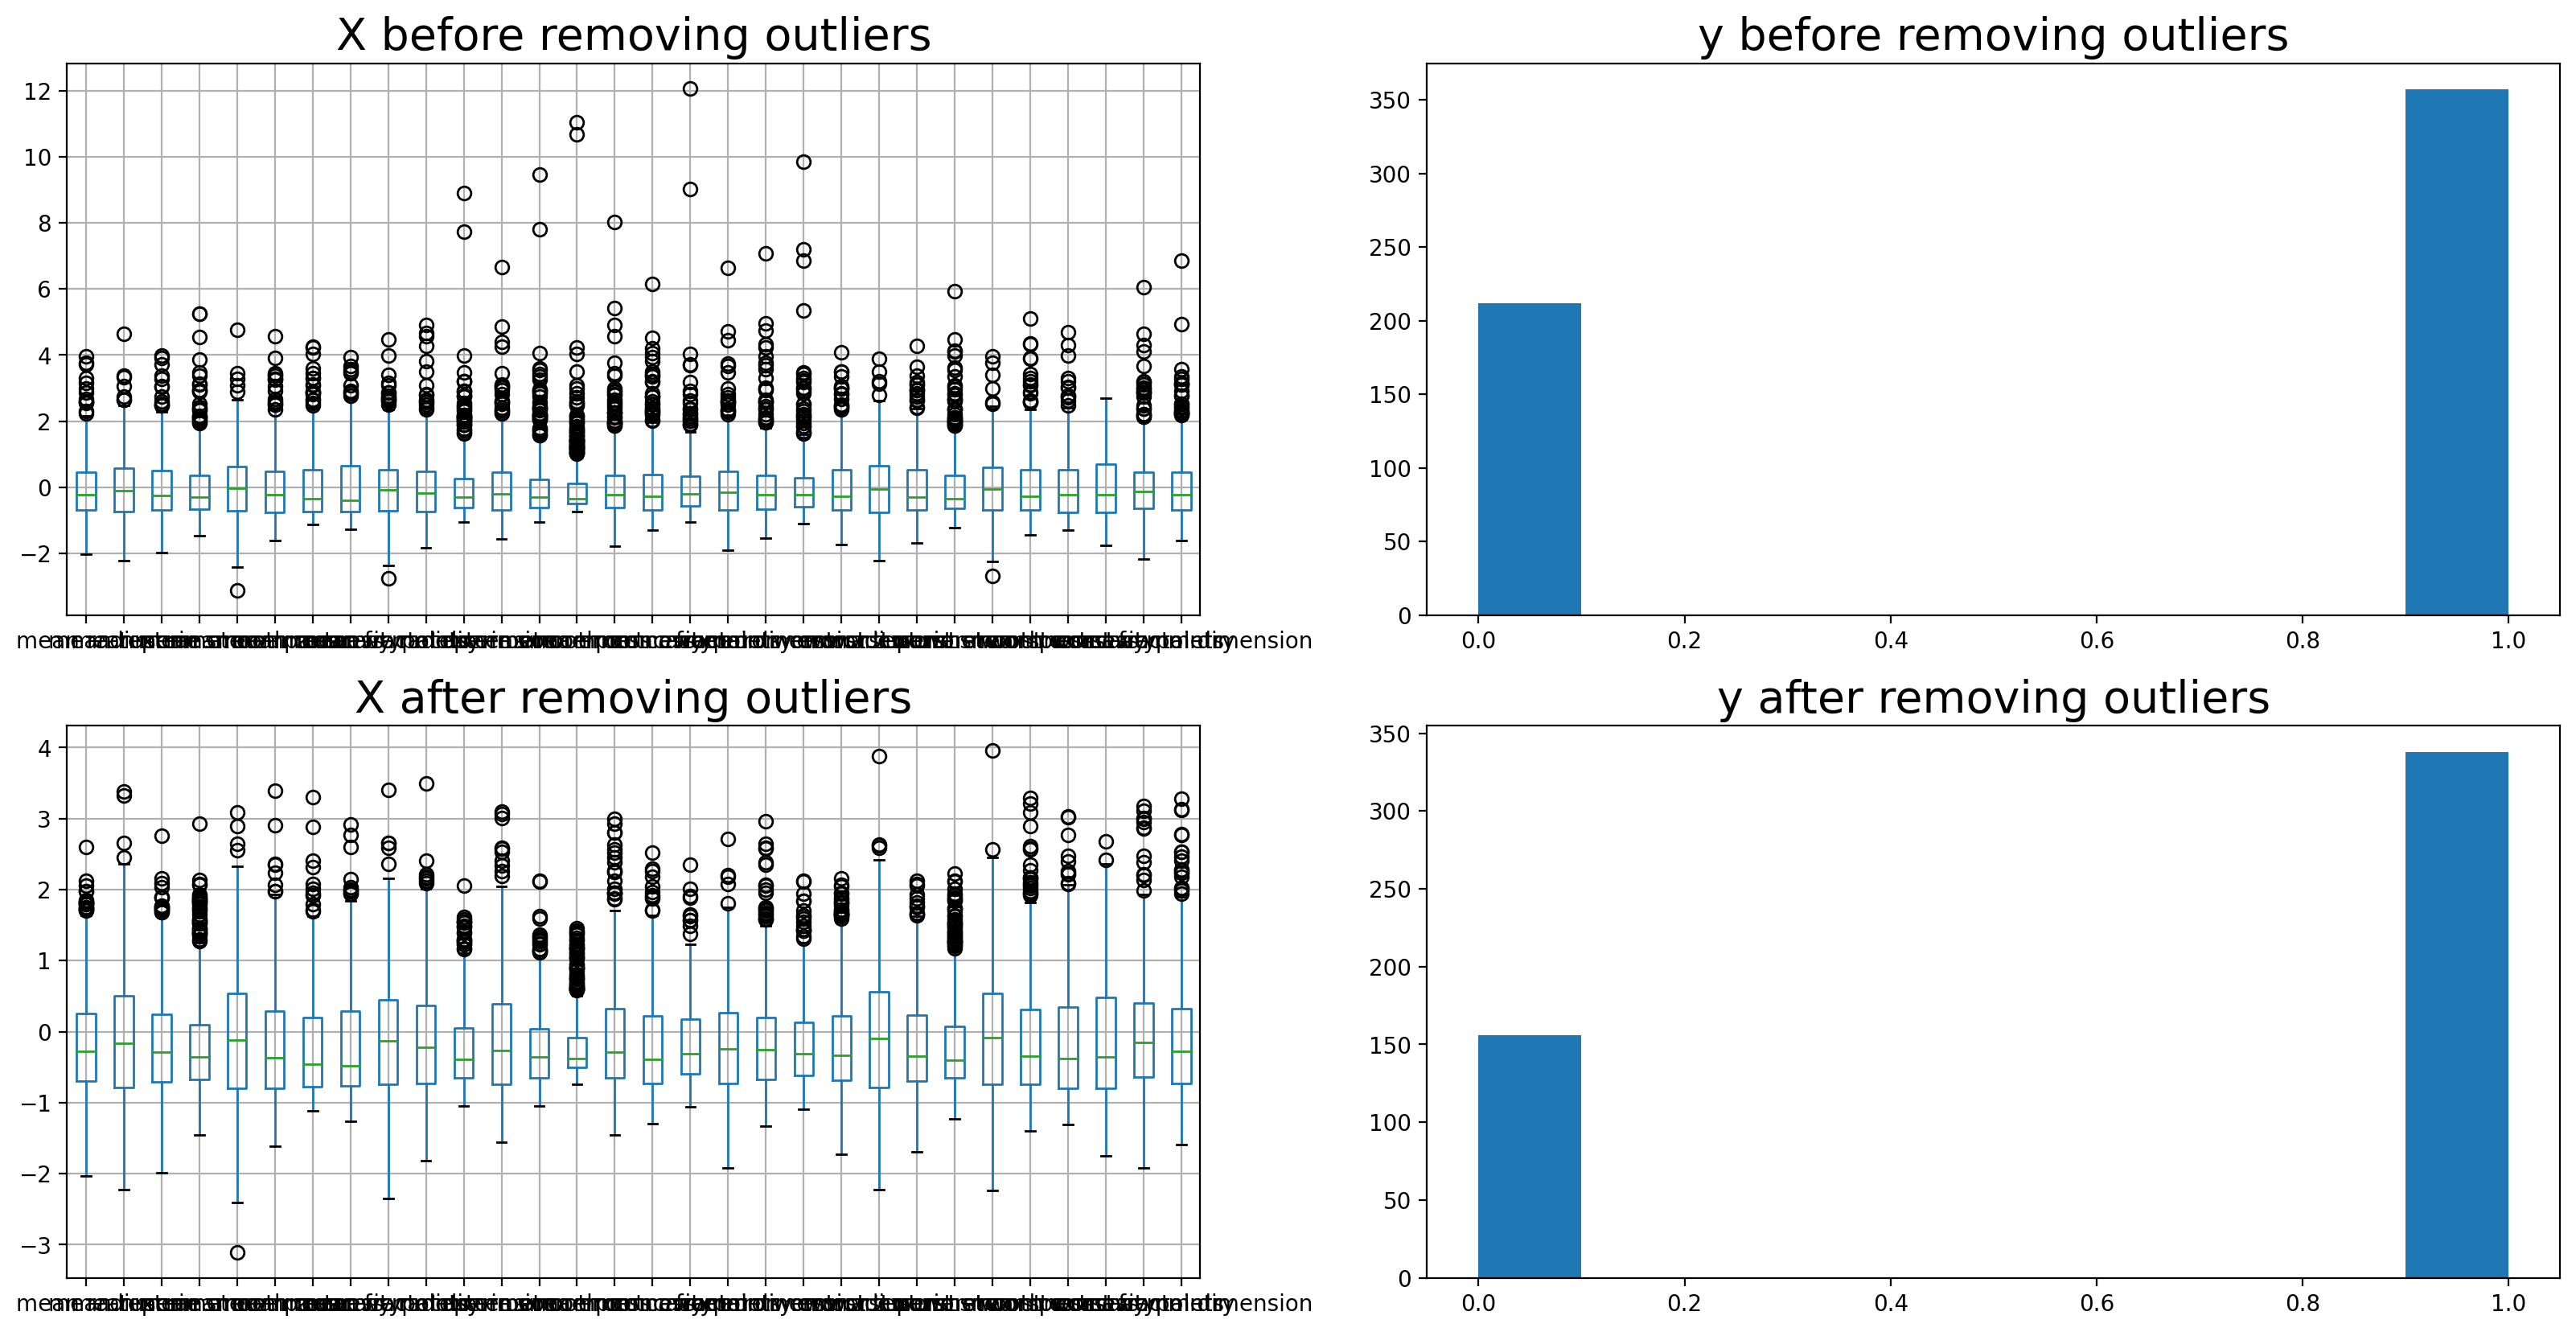

In [100]:
# data distribution after removing outliers

fig = plt.figure(figsize = (20,10), dpi = 200)

ax = fig.add_subplot(2,2,1)
X_scaled.boxplot()
plt.title('X before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,2)
plt.hist(y)
plt.title('y before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,3)
X_clean.boxplot()
plt.title('X after removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,4)
plt.hist(y_clean)
plt.title('y after removing outliers', fontsize = 20)

## 2. Training Test Split

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_clean,y_clean, test_size = 0.33, random_state = 42)

## 3. Features Selection using Lasso Regularization with parameter C found by k-folds CV

We use penalty **'l1' to implement Lasso regularization**, for wich the coefficients of the features which are not relevant are set to 0. **The strenght of the regularization is given by the inverse of the parameter C**: the lower C, the stronger the regularization.

Text(0, 0.5, 'Cross-Val Accuracy')

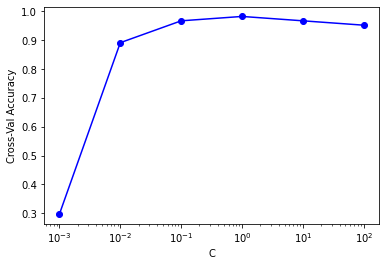

In [259]:
cv = 10

C_values = [0.001, 0.01, 0.1, 1.0, 10, 100]

cv_score = []

penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
fit_intercept = True
multi_class = 'auto'

for C in C_values:
    


    log_reg = LogisticRegression(penalty = penalty, 
                                solver = solver,
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)
    
    cross_val = cross_val_score(estimator = log_reg, X = X_train.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(C_values),np.array(cv_score),'bo-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

In [272]:
penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                             solver = solver,
                             C = C, 
                             fit_intercept = fit_intercept, 
                             multi_class = multi_class)

log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [310]:
def get_lasso_log_reg(log_reg,X):
    
    imortant_features = X.columns[np.where(log_reg.coef_[0] !=0)[0]]
    
    X = X[imortant_features]
    
    return X

In [313]:
X_train_lasso_log_reg = get_lasso_log_reg(log_reg,X_train)
X_test_lasso_log_reg = get_lasso_log_reg(log_reg,X_test)

In [315]:
X_train_lasso_log_reg

,mean concavity,mean concave points,radius error,smoothness error,compactness error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
447,0.855002,1.175970,0.504307,-0.288338,-0.374915,-0.599617,-0.404693,1.157759,0.085131,1.040681,1.076575,0.737820,0.497558,0.554153
108,2.080367,1.701909,0.325291,-0.669353,0.352767,-0.576612,-0.215945,1.317213,1.286918,1.234289,1.245335,-0.213419,1.415804,0.892184
37,0.424367,0.631459,-0.426147,-0.169667,-0.118382,-0.376832,-0.057458,-0.124082,0.370108,-0.132881,-0.213029,2.026595,1.095810,1.434251
157,-0.819454,-0.861239,-0.791399,0.263351,-0.933475,1.313423,-0.683464,-0.766038,0.130727,-0.824806,-0.687490,0.141652,-0.883505,-1.089406
460,-0.451719,-0.116567,0.119927,-0.151332,-0.409566,-0.265440,-0.558641,-0.573451,0.374993,-0.558223,-0.577093,0.110966,-0.650489,-0.207176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.049099,0.189608,1.026560,-0.871028,0.102382,-0.029337,-0.419444,1.253017,0.008594,1.219396,1.155681,-1.326851,0.232735,0.109537
270,-0.946385,-0.823580,-0.098791,0.105345,-0.820913,1.669394,-0.315425,-0.697700,-0.890303,-0.759575,-0.641081,-2.116335,-1.198510,-1.313846
348,0.392979,1.014241,0.175148,0.063343,0.125297,-0.775181,-0.173581,0.996235,-0.043516,0.918559,0.823436,0.693984,0.277832,1.260668
435,0.588837,0.481596,0.252385,0.879709,0.731139,0.459820,1.210441,-0.053674,1.182698,-0.037566,-0.162753,2.061664,0.316212,0.570903


## 4. Features Selection using Random Forest Classifier

In [316]:
def get_features_importances(rf,X,feature_threshold, plot):
    
    features_names = X.columns
    
    data = {'feature_name' : features_names,'feature_importance' : rf.feature_importances_}
    
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    
    selected_features = fi_df['feature_name'].values[:feature_threshold]
    
    X_rf = X[selected_features]
    
    if plot:

        #Define size of bar plot
        plt.figure(figsize = (10,8))
        #Plot Searborn bar chart
        sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_name'])
        #Add chart labels
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Name')
    

    return X_rf

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF Train Accuracy: 1.000
RF Test Accuracy: 0.963


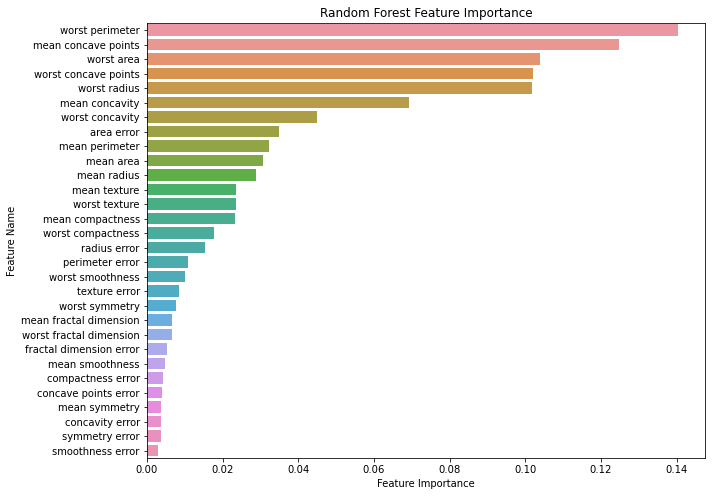

In [317]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print('RF Train Accuracy: {:.3f}'.format(train_acc))
print('RF Test Accuracy: {:.3f}'.format(test_acc))

feature_threshold = 12

X_train_rf = get_features_importances(rf, X_train, feature_threshold, plot = True)
X_test_rf = get_features_importances(rf, X_test, feature_threshold, plot = False)

In [318]:
X_train_rf

,worst perimeter,mean concave points,worst area,worst concave points,worst radius,mean concavity,worst concavity,area error,mean perimeter,mean area,mean radius,mean texture
447,1.040681,1.175970,1.076575,0.554153,1.157759,0.855002,0.497558,0.594550,1.187553,1.129424,1.187949,0.300273
108,1.234289,1.701909,1.245335,0.892184,1.317213,2.080367,1.415804,0.505884,1.582979,1.527599,1.608290,1.356762
37,-0.132881,0.631459,-0.213029,1.434251,-0.124082,0.424367,1.095810,-0.353943,-0.246689,-0.342115,-0.271884,-0.146523
157,-0.824806,-0.861239,-0.687490,-1.089406,-0.766038,-0.819454,-0.883505,-0.569120,-0.687837,-0.642736,-0.658144,-0.442061
460,-0.558223,-0.116567,-0.577093,-0.207176,-0.573451,-0.451719,-0.650489,-0.212912,-0.662299,-0.659801,-0.675185,-0.402501
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.219396,0.189608,1.155681,0.109537,1.253017,0.049099,0.232735,0.899714,1.294648,1.374017,1.383918,-0.088347
270,-0.759575,-0.823580,-0.641081,-1.313846,-0.697700,-0.946385,-1.198510,-0.201911,-0.550673,-0.505082,-0.482055,-0.532817
348,0.918559,1.014241,0.823436,1.260668,0.996235,0.392979,0.277832,0.208420,1.063983,0.957925,1.097064,0.318890
435,-0.037566,0.481596,-0.162753,0.570903,-0.053674,0.588837,0.316212,-0.028318,0.014868,-0.167771,-0.087275,1.210157


## 5. Fitting Logistic Regression on dataset with features selected by Random Forest

In [319]:
penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train_rf, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        98
         1.0       0.97      0.99      0.98       232

    accuracy                           0.97       330
   macro avg       0.97      0.96      0.97       330
weighted avg       0.97      0.97      0.97       330



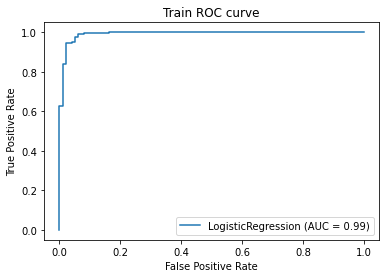

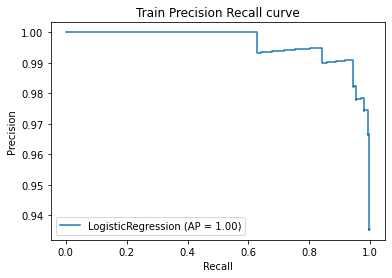

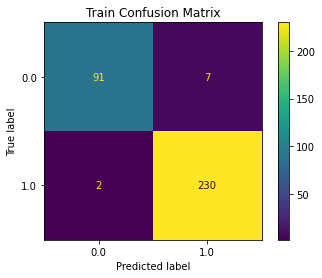

In [320]:
plot_classification_performance(log_reg, X_train_rf,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96        58
         1.0       0.97      0.98      0.98       106

    accuracy                           0.97       164
   macro avg       0.97      0.96      0.97       164
weighted avg       0.97      0.97      0.97       164



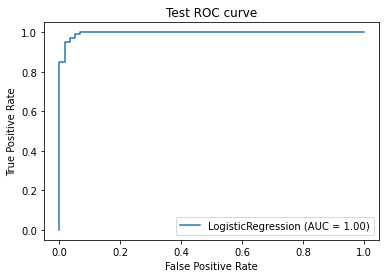

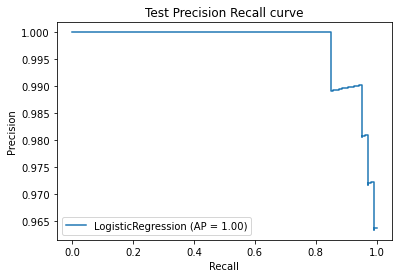

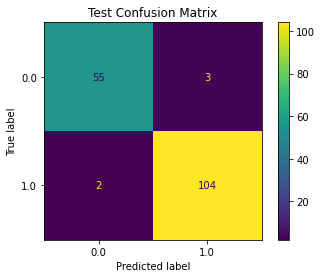

In [321]:
plot_classification_performance(log_reg, X_test_rf,y_test, step ='Test', binary = True)

## 6. Select the optimal number of features selected by Random Forest using k-folds Cross Validation

Text(0, 0.5, 'Cross-Val Accuracy')

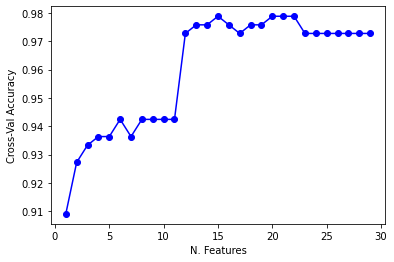

In [322]:
# find the optimal number of features to be selected

cv = 10

feature_threshold = np.arange(1,30)

cv_score = []

for ft in feature_threshold:
    
    X_train_rf = get_features_importances(rf, X_train, ft, plot = False)
    
    cross_val = cross_val_score(estimator = log_reg, X = X_train_rf.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(feature_threshold,np.array(cv_score),'bo-')
plt.xlabel('N. Features')
plt.ylabel('Cross-Val Accuracy')

In [323]:
# extract from the train and test datasets the relevant features found with k-folds cv

ft = 11

X_train_rf = get_features_importances(rf, X_train, ft, plot = False)
X_test_rf = get_features_importances(rf, X_test, ft, plot = False)

In [324]:
X_train_rf

,worst perimeter,mean concave points,worst area,worst concave points,worst radius,mean concavity,worst concavity,area error,mean perimeter,mean area,mean radius
447,1.040681,1.175970,1.076575,0.554153,1.157759,0.855002,0.497558,0.594550,1.187553,1.129424,1.187949
108,1.234289,1.701909,1.245335,0.892184,1.317213,2.080367,1.415804,0.505884,1.582979,1.527599,1.608290
37,-0.132881,0.631459,-0.213029,1.434251,-0.124082,0.424367,1.095810,-0.353943,-0.246689,-0.342115,-0.271884
157,-0.824806,-0.861239,-0.687490,-1.089406,-0.766038,-0.819454,-0.883505,-0.569120,-0.687837,-0.642736,-0.658144
460,-0.558223,-0.116567,-0.577093,-0.207176,-0.573451,-0.451719,-0.650489,-0.212912,-0.662299,-0.659801,-0.675185
...,...,...,...,...,...,...,...,...,...,...,...
106,1.219396,0.189608,1.155681,0.109537,1.253017,0.049099,0.232735,0.899714,1.294648,1.374017,1.383918
270,-0.759575,-0.823580,-0.641081,-1.313846,-0.697700,-0.946385,-1.198510,-0.201911,-0.550673,-0.505082,-0.482055
348,0.918559,1.014241,0.823436,1.260668,0.996235,0.392979,0.277832,0.208420,1.063983,0.957925,1.097064
435,-0.037566,0.481596,-0.162753,0.570903,-0.053674,0.588837,0.316212,-0.028318,0.014868,-0.167771,-0.087275


In [325]:
# fit the logistic regression

penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train_rf, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        98
         1.0       0.96      0.97      0.97       232

    accuracy                           0.95       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.95      0.95      0.95       330



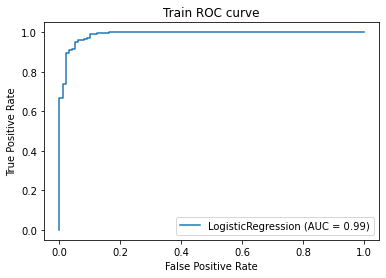

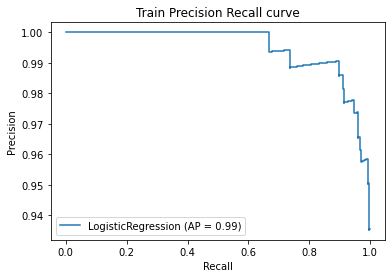

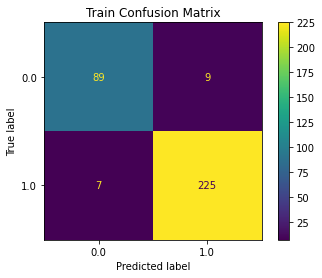

In [326]:
# train performance

plot_classification_performance(log_reg, X_train_rf,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        58
         1.0       0.96      0.97      0.97       106

    accuracy                           0.96       164
   macro avg       0.95      0.95      0.95       164
weighted avg       0.96      0.96      0.96       164



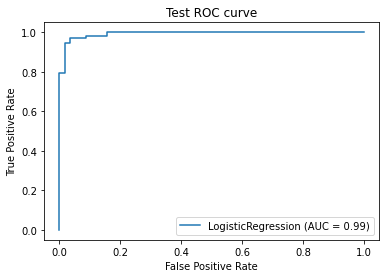

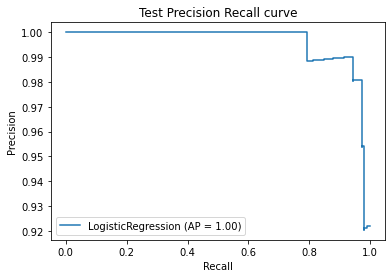

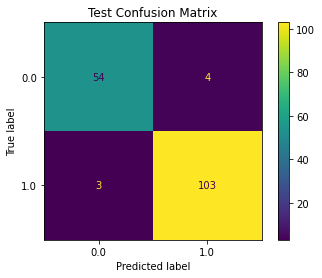

In [327]:
# test performance

plot_classification_performance(log_reg, X_test_rf,y_test, step ='Test', binary = True)

## 7. Reduce the dimensionality of the dataset with PCA and then fit Logistic Regression

In [329]:
def get_pca(X, n_components):

    pca = PCA(n_components = n_components)

    pca.fit(X)

    X_pca = pca.fit_transform(X)

    X_pca = pd.DataFrame(X_pca)
    
    fn = []
    
    for i in range(n_components):
        
        fn.append('component ' + str(i + 1))
        
    X_pca.columns = fn
    
    pve = pca.explained_variance_ratio_
    
    for i in range(n_components):
    
        print('PVE component {}: {:.1f} %'.format(i + 1, pve[i] * 100))
    print('Cumulative PVE: {:.1f} %'.format(sum(pve)*100))
    
    return X_pca, pca, pve

In [350]:
n_components = 6

X_train_pca, pca, pve= get_pca(X_train_lasso_log_reg,n_components)
X_test_pca = pca.fit_transform(X_test)

PVE component 1: 51.2 %
PVE component 2: 16.7 %
PVE component 3: 9.7 %
PVE component 4: 8.4 %
PVE component 5: 6.5 %
PVE component 6: 2.8 %
Cumulative PVE: 95.3 %


In [337]:
# the biplot illustrates the loading vectors of each features and 
# the data plotted in the principal component space

# in an element phi_jm of the loading vector phi_m of the feature m associated with the feature j
# has a high positive value, it means that the feature j has a high contribution to the component m


def get_biplot(X_pca,comp_ax_hor,comp_ax_ver,features_names):
    
    score = X_pca.values
    coeff = np.transpose(pca.components_[[comp_ax_hor-1,comp_ax_ver-1], :])
    
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    plt.xlabel('Component {}'.format(comp_ax_hor))
    plt.ylabel('Component {}'.format(comp_ax_ver))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if features_names is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features_names[i], color = 'g', ha = 'center', va = 'center')

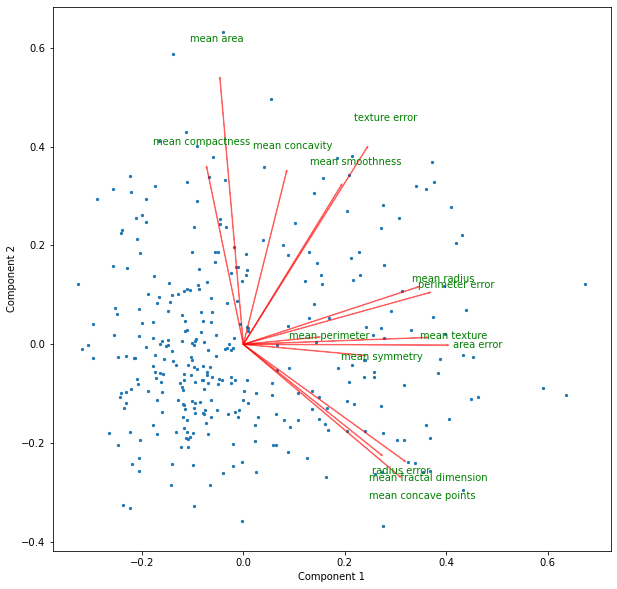

In [338]:
comp_ax_hor = 1

comp_ax_ver = 2

features_names = X_train.columns

get_biplot(X_train_pca,comp_ax_hor, comp_ax_ver, features_names )

In [339]:
# fit the logistic regression

penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train_pca, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        98
         1.0       0.98      1.00      0.99       232

    accuracy                           0.98       330
   macro avg       0.99      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



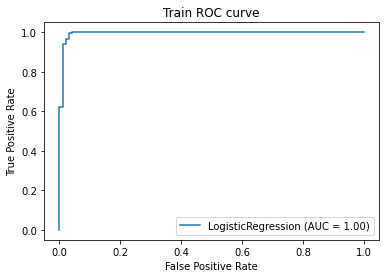

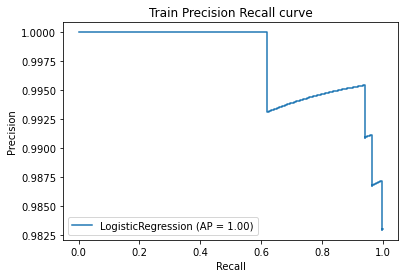

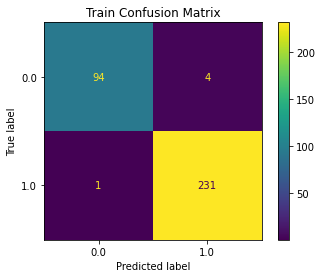

In [340]:
# train performance

plot_classification_performance(log_reg, X_train_pca,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        58
         1.0       0.93      0.98      0.95       106

    accuracy                           0.94       164
   macro avg       0.95      0.92      0.93       164
weighted avg       0.94      0.94      0.94       164



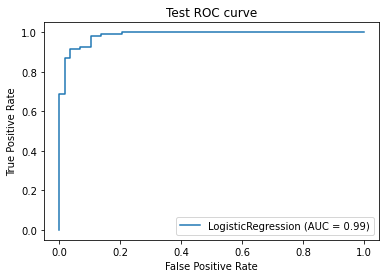

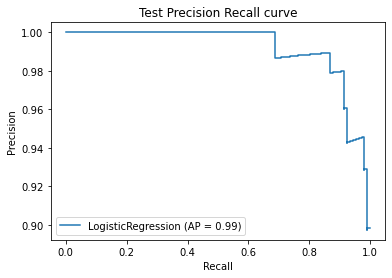

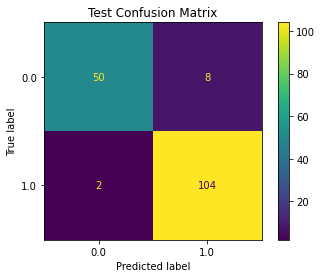

In [351]:
# test performance

plot_classification_performance(log_reg, X_test_pca,y_test, step ='Test', binary = True)